# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
data = pd.read_csv('Classified Data')
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
data['TARGET CLASS']

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

### Train/Test split, model fit and prediction

In [35]:
from sklearn.model_selection import train_test_split
X = df_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.40, random_state=101)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,
                                                    test_size=0.50, random_state=101)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
pred = knn.predict(X_val)

In [38]:
y_test

247    1
148    1
767    1
31     1
852    1
      ..
355    1
878    0
849    1
977    0
910    1
Name: TARGET CLASS, Length: 200, dtype: int64

In [39]:
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1])

In [40]:
len(pred)

200

### Evaluation of classification quality using Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_val, pred)

print(cf_matrix)

[[108   6]
 [  8  78]]


***Print Misclassification error rate***

In [42]:
cf_matrix.sum()

200

In [43]:
error=1-((cf_matrix[0][0]+cf_matrix[1][1])/cf_matrix.sum())
error

0.06999999999999995

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [47]:
j=0
err=[]

while j<5:
    i=2
    current=[]
    while i<20:
        X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                            test_size=0.40)
        X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,
                                                            test_size=0.50)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        
        cf_matrix = confusion_matrix(y_test, pred)

        error=1-((cf_matrix[0][0]+cf_matrix[1][1])/cf_matrix.sum())
        current.append(error)
             
        i+=1
    err.append(current)            
    j+=1  
min_err=[]
max_err=[]
avg_err=[]
j=0
while j<18:
    i=0
    temp=[]
    while i<5:
        temp.append(err[i][j])
        i+=1
    min_err.append(min(temp))  
    max_err.append(max(temp))
    avg_err.append(sum(temp)/len(temp))
    j+=1
    

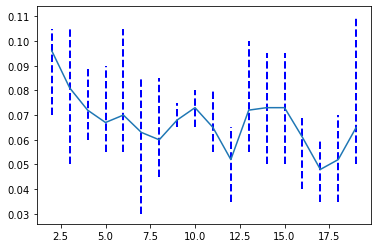

In [48]:
plt.plot(list(range(2,20)),avg_err)
plt.vlines(x=list(range(2,20)), ymin=min_err, ymax=max_err,colors='blue',ls='--',lw=2)